In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("C:\\Users\\MAHIMA\\OneDrive\\Desktop\\Feynn Labs internship\\P2\\Indian automoble buying behavour.csv")
df.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marital Status    99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
df.isnull().sum()

Age                 0
Profession          0
Marital Status      0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [6]:
df1 = df.drop(['Wife Working', 'Salary', 'Wife Salary'], axis = 1)
df1.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,2600000,SUV,1600000


## EDA

In [7]:
df1["Marital Status"].value_counts()

Marital Status
Married    84
Single     15
Name: count, dtype: int64

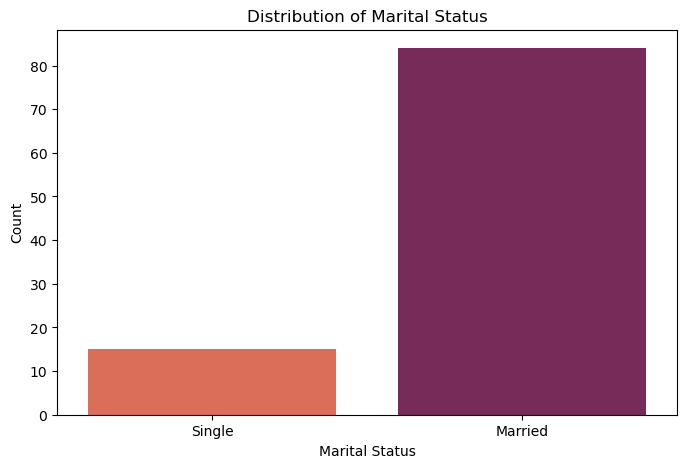

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(df1, x='Marital Status', palette="rocket_r")
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [9]:
df1["Education"].value_counts()

Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64

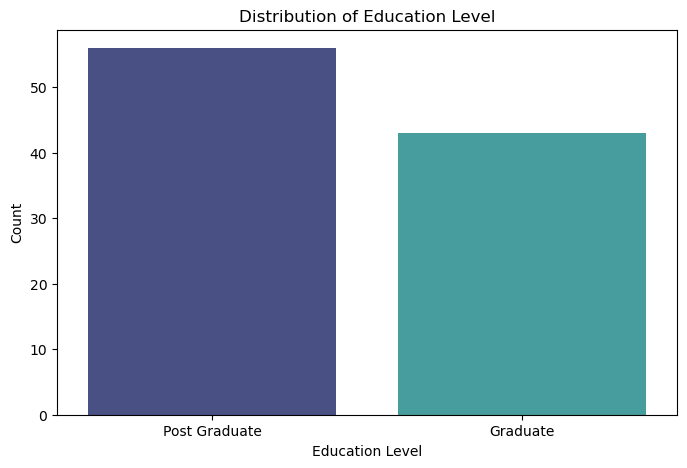

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(df1, x='Education', palette="mako")
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [11]:
df1["Personal loan"].value_counts()

Personal loan
No     67
Yes    32
Name: count, dtype: int64

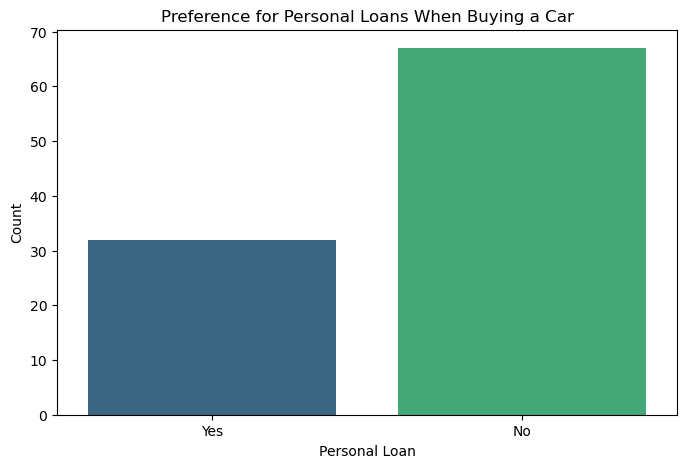

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(df1, x='Personal loan', palette="viridis")
plt.title('Preference for Personal Loans When Buying a Car')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

In [13]:
df1["No of Dependents"].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

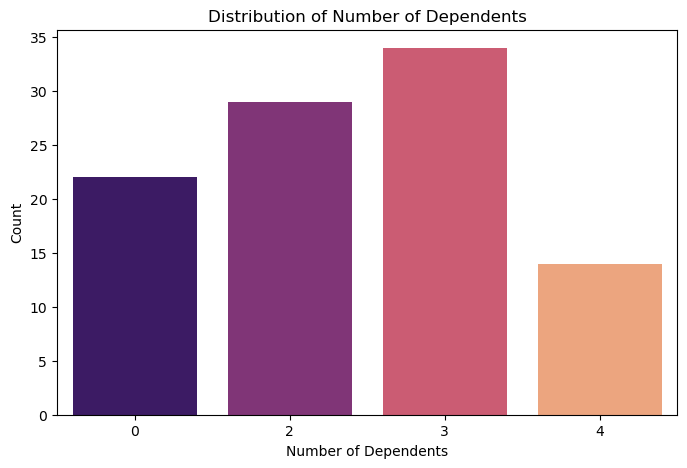

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(df1, x='No of Dependents', palette="magma")
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

In [15]:
# Create Age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
df1_copy = df1.copy()
df1_copy
df1_copy['Age_group'] = pd.cut(df1_copy['Age'], bins=bins, labels=labels, right=False)

# Calculate the number of cars bought by each age group
age_grp = df1_copy.groupby('Age_group')['Age'].count()
age_grp

Age_group
18-25     0
25-35    38
35-45    51
45-55    10
55-65     0
65+       0
Name: Age, dtype: int64

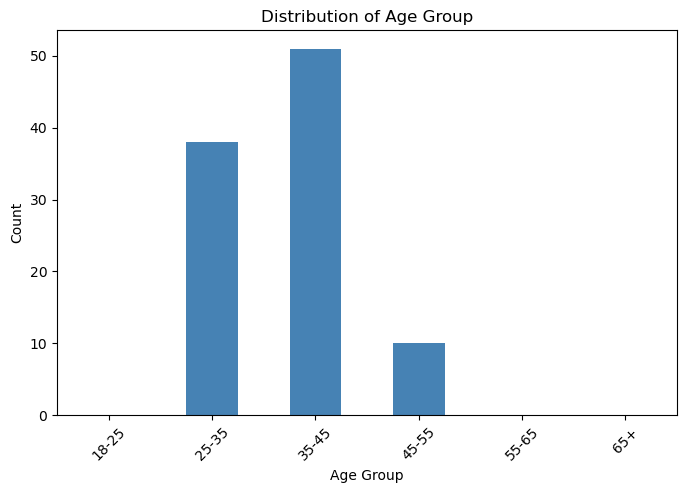

In [16]:
# Plot the bar graph
plt.figure(figsize=(8,5))
age_grp.plot(kind='bar', color='steelblue')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
label_df = LabelEncoder()

df1["Marital Status"] = label_df.fit_transform(df1["Marital Status"])
df1["Profession"] = label_df.fit_transform(df1["Profession"])
df1["Education"] = label_df.fit_transform(df1["Education"])
df1["House Loan"] = label_df.fit_transform(df1["House Loan"])
df1["Make"] = label_df.fit_transform(df1["Make"])
df1["Personal loan"] = label_df.fit_transform(df1["Personal loan"])

df1.head() 

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price
0,27,1,1,1,0,1,0,800000,8,800000
1,35,1,0,1,2,1,1,2000000,1,1000000
2,45,0,0,0,4,1,1,1800000,4,1200000
3,41,0,0,1,3,0,0,2200000,2,1200000
4,31,1,0,1,2,1,0,2600000,6,1600000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price
0,-1.498630,0.739510,2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.406760,1.621410,-0.904843
1,-0.211304,0.739510,-0.422577,0.876275,-0.136859,1.446980,1.294479,-0.258937,-0.920755,-0.445579
2,1.397855,-1.352247,-0.422577,-1.141195,1.368594,1.446980,1.294479,-0.450240,0.168744,0.013685
3,0.754191,-1.352247,-0.422577,0.876275,0.615867,-0.691095,-0.772512,-0.067633,-0.557589,0.013685
4,-0.854967,0.739510,-0.422577,0.876275,-0.136859,1.446980,-0.772512,0.314975,0.895077,0.932213


In [19]:
from sklearn.decomposition import PCA
pca = PCA()
df3 = pca.fit_transform(df2)
df3.shape

(99, 10)

In [20]:
pca_df = pd.DataFrame(data = df3, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-3.218683,-0.582903,-2.240041,1.534741,-0.301351,-0.030509,1.222559,0.526041,0.099042,-0.170872
1,-0.068562,1.797582,-1.481126,-0.537939,-0.205033,-0.441196,-0.449424,-0.110598,0.433291,-0.285880
2,1.216292,2.258730,1.235193,1.176000,0.360087,-0.683710,0.681222,0.057416,-0.435860,-0.626861
3,0.498357,-0.328571,1.352718,-0.382766,-1.545110,-0.612060,-0.067728,0.046374,0.105074,0.026707
4,0.265417,-0.497030,-1.481088,0.540894,-0.092444,0.034414,0.855914,-0.365101,1.722224,-0.239943


In [21]:
# Calculate the standard deviation of each principal component
std_dev = pca.explained_variance_ ** 0.5

# Calculate the proportion of variance explained by each principal component
proportion_variance = pca.explained_variance_ratio_

# Calculate the cumulative proportion of variance explained
cumulative_proportion = proportion_variance.cumsum()

# Create a summary dataframe
pca_summary = pd.DataFrame({
    'Standard Deviation': std_dev.round(4),
    'Proportion of Variance': proportion_variance.round(4),
    'Cumulative Proportion': cumulative_proportion.round(4)
})

# Rotate the dataframe
pca_summary_rotated = pca_summary.T
pca_summary_rotated.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10']

# Display the rotated summary
pca_summary_rotated

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
Standard Deviation,1.7053,1.4229,1.1186,0.9815,0.9734,0.8241,0.6900,0.6070,0.5557,0.4181
Proportion of Variance,0.2879,0.2004,0.1239,0.0954,0.0938,0.0672,0.0471,0.0365,0.0306,0.0173
Cumulative Proportion,0.2879,0.4883,0.6121,0.7075,0.8013,0.8685,0.9157,0.9521,0.9827,1.0000


In [22]:
#factor loadings
factor_loadings = pd.DataFrame(pca.components_, index = pca_summary_rotated.columns, columns=df1.columns).T.style.background_gradient(cmap = 'Purples')
factor_loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
Age,0.485215,0.052441,0.147460,-0.125723,-0.098146,-0.268228,0.205597,0.615704,-0.396594,-0.253058
Profession,0.084354,-0.049745,-0.661984,-0.465478,0.254918,0.447054,0.223437,0.066455,-0.119568,-0.045170
Marital Status,-0.438043,-0.208149,-0.186001,0.124956,0.095065,-0.422804,0.335833,-0.137238,-0.588964,0.219739
Education,0.064843,-0.132204,-0.471445,-0.064927,-0.816725,-0.223659,-0.143327,-0.075815,0.087301,-0.029425
No of Dependents,0.386431,0.302819,0.220836,-0.035935,-0.266058,0.214471,0.480009,-0.519483,-0.184137,0.240729
Personal loan,-0.027405,0.525404,-0.322127,0.228825,0.148696,-0.365747,0.421320,0.106819,0.469016,-0.047903
House Loan,0.184618,0.505983,-0.272685,0.232181,0.163613,-0.056515,-0.544958,-0.227147,-0.426213,-0.146411
Total Salary,0.481592,-0.224723,-0.145716,0.036404,0.235041,-0.235132,-0.186694,0.062936,0.131773,0.726842
Make,0.147059,-0.270268,-0.183360,0.799245,-0.062314,0.409155,0.165657,0.162482,-0.058275,-0.066231
Price,0.351629,-0.432041,-0.037819,0.004092,0.265543,-0.306191,0.085348,-0.478205,0.132730,-0.520003


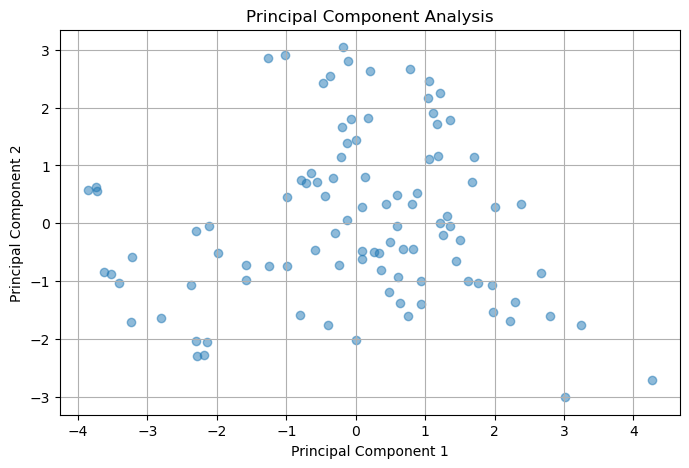

In [23]:
# Plot the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.grid(True)
plt.show()

## K-Means Model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

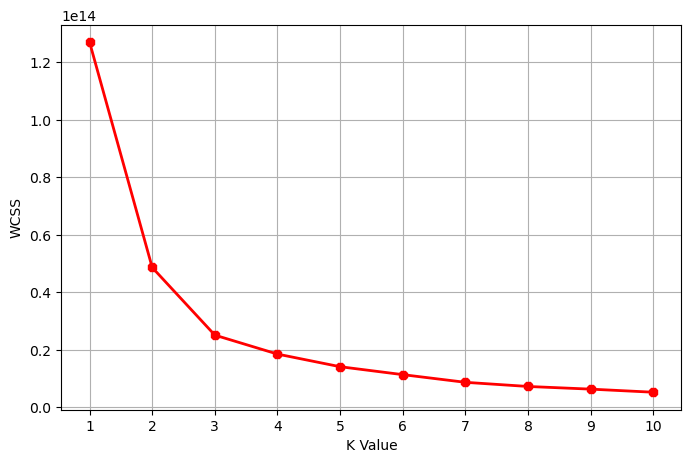

In [24]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init= 10, random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [25]:
#We get k value = 3

model = KMeans(n_clusters=3, n_init=10, random_state=42)
model.fit_predict(df3)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


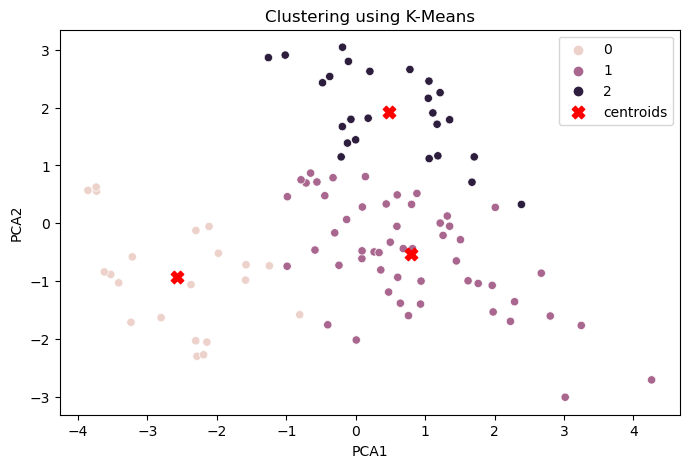

In [26]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

In [27]:
## Creating a target column 'Cluster' for storing clustered segments
new_df = pd.concat([df1, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Total Salary,Make,Price,Cluster
0,27,1,1,1,0,1,0,800000,8,800000,0
1,35,1,0,1,2,1,1,2000000,1,1000000,2
2,45,0,0,0,4,1,1,1800000,4,1200000,2
3,41,0,0,1,3,0,0,2200000,2,1200000,1
4,31,1,0,1,2,1,0,2600000,6,1600000,1


<Axes: xlabel='Cluster', ylabel='count'>

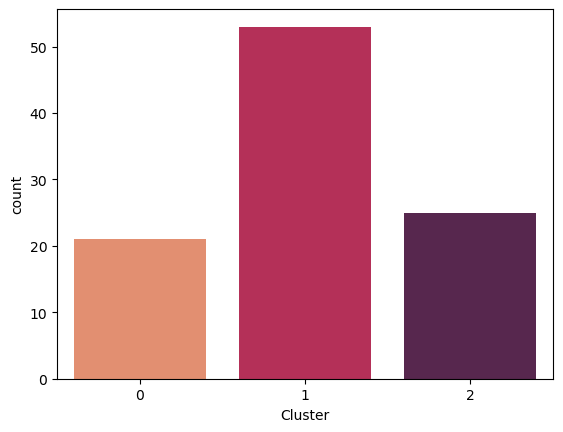

In [31]:
sns.countplot(x = 'Cluster', data = new_df, palette="rocket_r")

In [32]:
new_df['Cluster'].value_counts()

Cluster
1    53
2    25
0    21
Name: count, dtype: int64

In [33]:
df4 = pd.concat([df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df4.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1


In [34]:
def categorize_income(income):
    if income < 500000:
        return '<5lakh'
    elif 500000 <= income < 1000000:
        return '5-10lakh'
    elif 1000000 <= income < 2000000:
        return '10-20lakh'
    elif 2000000 <= income < 3000000:
        return '20-30lakh'
    elif 3000000 <= income < 4000000:
        return '30-40lakh'
    else:
        return '>40lakh'

In [35]:
def categorize_price(price):
    if price < 1000000:
        return '<10lakh'
    elif 1000000 <= price < 1500000:
        return '10-15lakh'
    elif 1500000 <= price < 2000000:
        return '15-20lakh'
    else:
        return '>20lakh'

In [36]:
df4['Annual Family Income'] = df4['Total Salary'].apply(categorize_income)
df4['Price Range'] = df4['Price'].apply(categorize_price)
df4.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster,Annual Family Income,Price Range
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0,5-10lakh,<10lakh
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2,20-30lakh,10-15lakh
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2,10-20lakh,10-15lakh
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1,20-30lakh,10-15lakh
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1,20-30lakh,15-20lakh


In [37]:
cl0 = df4[df4['Cluster'] == 0]
cl1 = df4[df4['Cluster'] == 1]
cl2 = df4[df4['Cluster'] == 2]
datasets = [cl0, cl1, cl2]

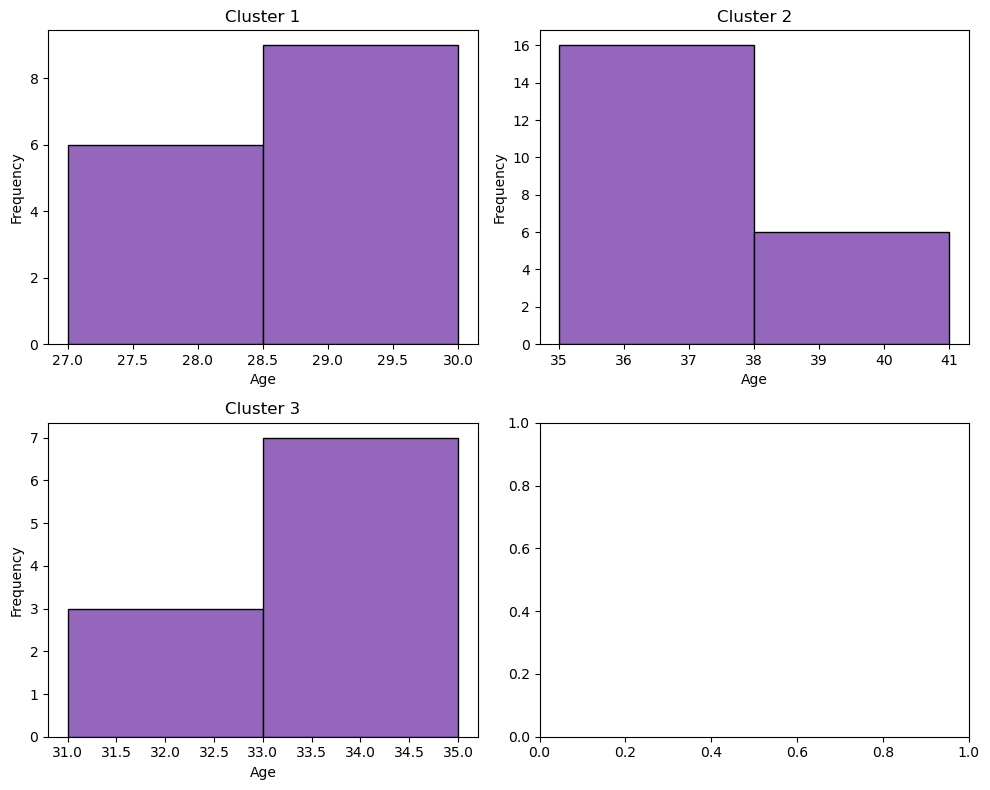

In [45]:
# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ages = dataset['Age'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ages.index, bins = 2, weights = top_ages.values, color = "tab:purple", ec = 'k')

    # Set labels and titles
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Cluster {i+1}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

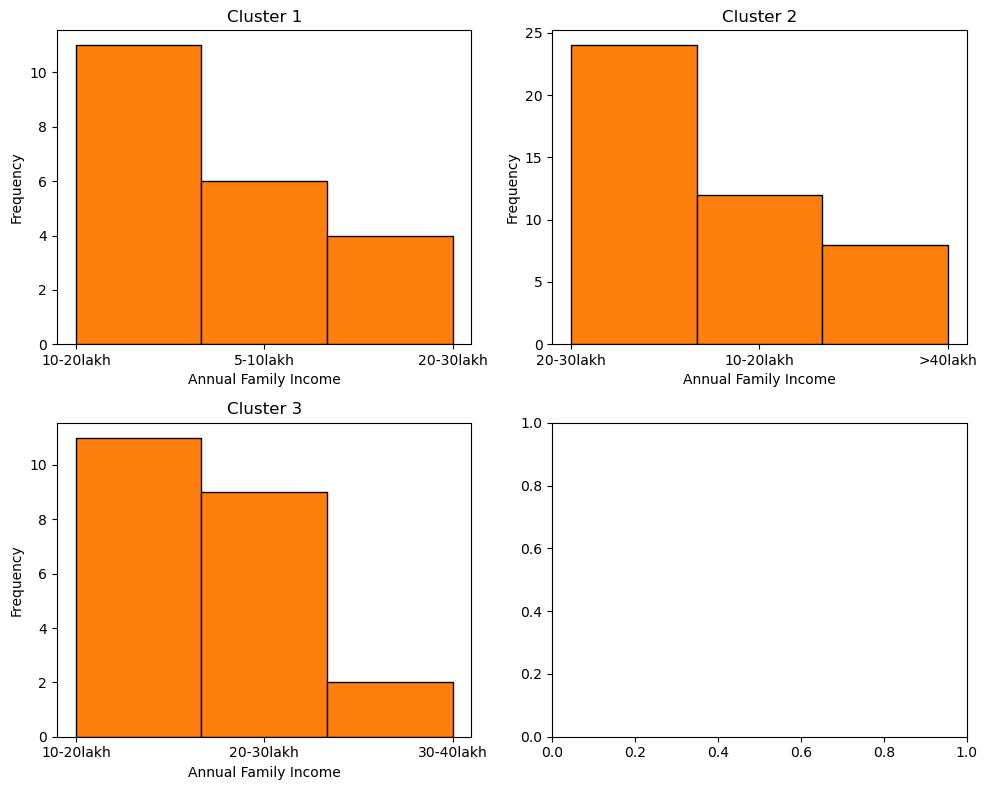

In [42]:
# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ev_type = dataset['Annual Family Income'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ev_type.index, bins = 3, weights = top_ev_type.values, color = 'tab:orange', ec = "k")

    # Set labels and titles
    ax.set_xlabel('Annual Family Income')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Cluster {i+1}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

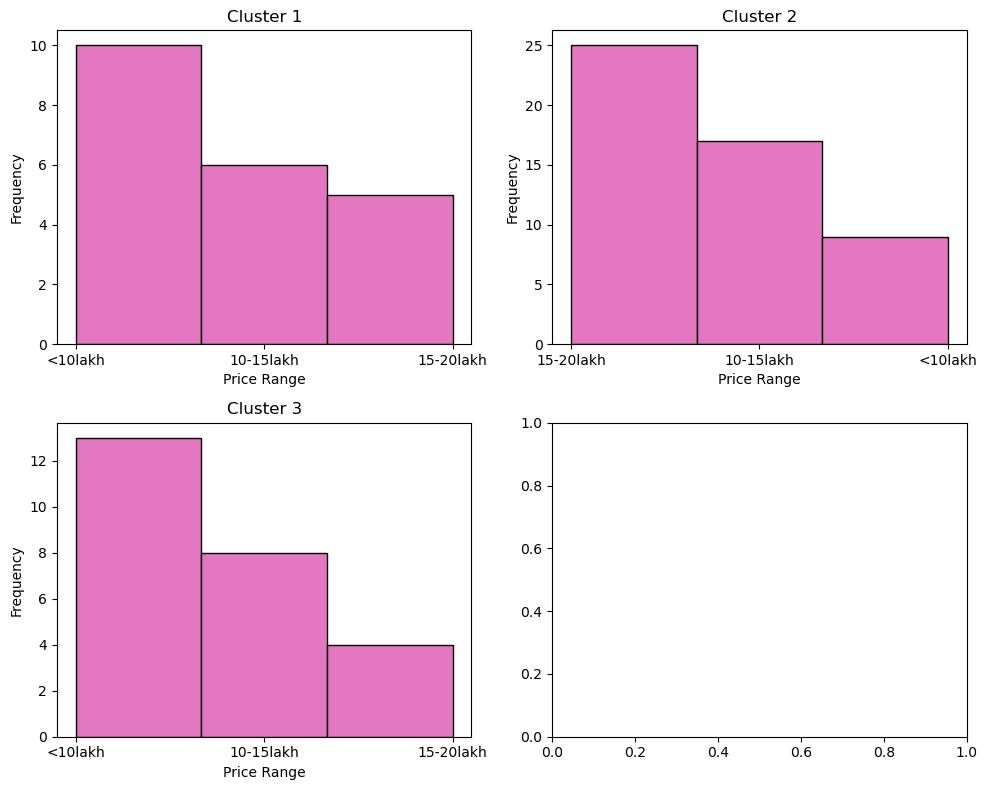

In [43]:
# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ev_type = dataset['Price Range'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ev_type.index, bins = 3, weights = top_ev_type.values, color = 'tab:pink', ec = "k")

    # Set labels and titles
    ax.set_xlabel('Price Range')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Cluster {i+1}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()